In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [59]:
df = pd.read_csv ('disaster_response_messages_validation.csv')

In [60]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2573 entries, 0 to 2572
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      2573 non-null   int64 
 1   split                   2573 non-null   object
 2   message                 2573 non-null   object
 3   original                987 non-null    object
 4   genre                   2573 non-null   object
 5   related                 2573 non-null   int64 
 6   PII                     2573 non-null   int64 
 7   request                 2573 non-null   int64 
 8   offer                   2573 non-null   int64 
 9   aid_related             2573 non-null   int64 
 10  medical_help            2573 non-null   int64 
 11  medical_products        2573 non-null   int64 
 12  search_and_rescue       2573 non-null   int64 
 13  security                2573 non-null   int64 
 14  military                2573 non-null   int64 
 15  chil

In [61]:
df.head(10)

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,8,validation,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,validation,I am in Croix-des-Bouquets. We have health iss...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,28,validation,are you going to call me or do you want me to ...,Eske se rele nap relem oubyen se mwen kap rele...,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38,validation,"People I'm at Delma 2, we don't anything what ...",MEZANMI MWEN MWEN NAN DELMA 2 NOU TR MAN MAL N...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,48,validation,How we can find food and water? we have people...,Comment nou ka jwen dlo ak manje nou gen moun ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,58,validation,"Good evening, is the earthquake end?",Bonswa eske tanbleman te fini,direct,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
6,68,validation,What's up? I would like to know how the Arab i...,Sak pase mwen ta renmen konnen kijan arab la ye,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,78,validation,How can we find help and food in fontamara 43 ...,Koman nou ka jwenn sekou ak manje nan fontamar...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
8,88,validation,We are seven in the house. Located betwenn Mus...,Mwen salye nou pou sipo n ak solidarite nap ba...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,108,validation,Whoever sees her in the streets : she was wear...,AL NENPOT MOUN KI WEL NAN LARI MEN KI KOULE RA...,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Proprocessing the dataset

In [62]:
#remove short words
df['message'] = df['message'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,8,validation,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,validation,Croix-des-Bouquets. have health issues. They w...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,28,validation,going call want call know?,Eske se rele nap relem oubyen se mwen kap rele...,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38,validation,"People Delma don't anything what ever, please ...",MEZANMI MWEN MWEN NAN DELMA 2 NOU TR MAN MAL N...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,48,validation,find food water? have people many differents n...,Comment nou ka jwen dlo ak manje nou gen moun ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
tweet_words = df['message'].apply(lambda x: x.split())
tweet_words.head

<bound method NDFrame.head of 0                                [Looking, someone, name]
1       [Croix-des-Bouquets., have, health, issues., T...
2                        [going, call, want, call, know?]
3       [People, Delma, don't, anything, what, ever,, ...
4       [find, food, water?, have, people, many, diffe...
                              ...                        
2568    ["With, more, than, 7,500, people, infected, a...
2569    [About, percent, China's, rivers, lakes, pollu...
2570    [Senegal, Guinea-Bissau, have, agreed, conduct...
2571    [recruiting, sanitary, engineer, consultant, f...
2572    [However, while, ECOWAS, wanted, lead, 12-mont...
Name: message, Length: 2573, dtype: object>

In [64]:
for i in range(len(tweet_words)):
    tweet_words[i] = " ".join(tweet_words[i])

df['message'] = tweet_words
df.head()

,id,split,message,original,genre,related,PII,request,offer,aid_related,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,8,validation,Looking someone name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18,validation,Croix-des-Bouquets. have health issues. They w...,"Nou kwadebouke, nou gen pwoblem sant m yo nan ...",direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,28,validation,going call want call know?,Eske se rele nap relem oubyen se mwen kap rele...,direct,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,38,validation,"People Delma don't anything what ever, please ...",MEZANMI MWEN MWEN NAN DELMA 2 NOU TR MAN MAL N...,direct,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4,48,validation,find food water? have people many differents n...,Comment nou ka jwen dlo ak manje nou gen moun ...,direct,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Exploratory Data Analysis

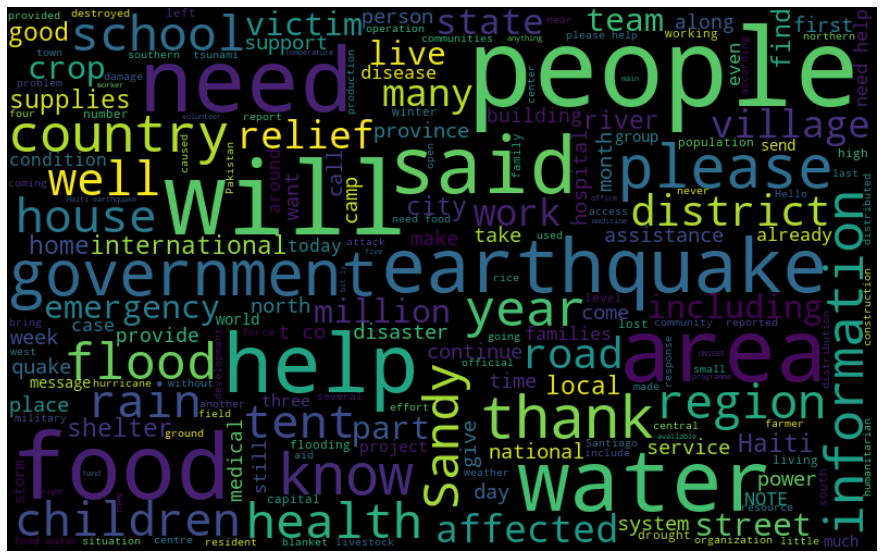

In [65]:
#visualisasi frequensi kata
all_words = " ".join([sentence for sentence in df['message']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot grafik
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('frequensi kata request = 0.png')
plt.show()

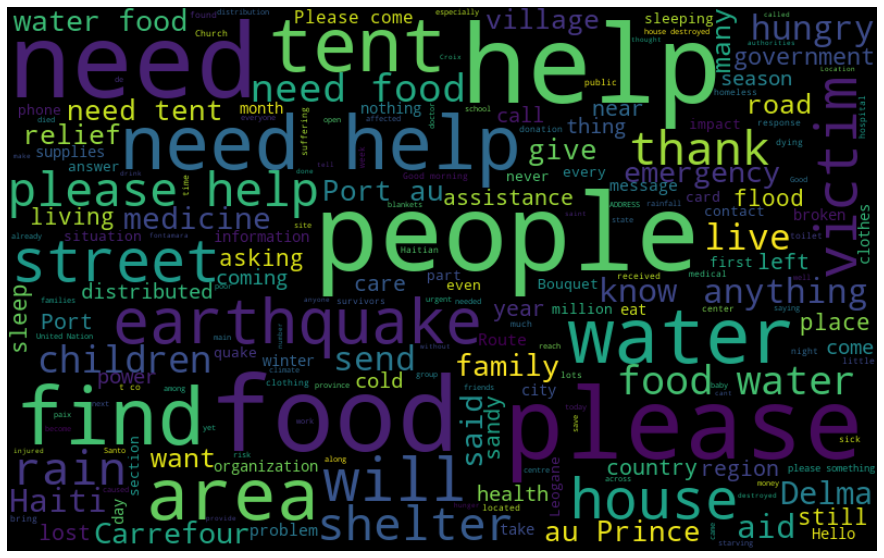

In [66]:
#visualisasi frequensi kata
all_words = " ".join([sentence for sentence in df['message'][df['request']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#Plot grafik
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('frequensi kata request = 1.png')
plt.show()

In [67]:
#extract the hashtag
def hashtag_extract(messages):
    hashtags = []
    #Loop words in the tweet
    for message in messages:
        ht = re.findall(r"(\w+)", message)
        hashtags.append(ht)
    return hashtags

In [68]:
#extract hashtag from disaster tweet
ht_disaster = hashtag_extract(df['message'][df['request']==1])

#extract hashtag from non disaster tweet
ht_nondisaster = hashtag_extract(df['message'][df['request']==0])

In [69]:
ht_disaster[:3]

[['Croix',
  'des',
  'Bouquets',
  'have',
  'health',
  'issues',
  'They',
  'workers',
  'Santo',
  'area',
  'Croix',
  'des',
  'Bouquets'],
 ['People',
  'Delma',
  'don',
  't',
  'anything',
  'what',
  'ever',
  'please',
  'provide',
  'with',
  'some',
  'food',
  'water',
  'medicine'],
 ['find', 'help', 'food', 'fontamara', 'menos']]

In [70]:
#list the words tweet
ht_disaster = sum(ht_disaster, [])
ht_nondisaster = sum(ht_nondisaster, [])

In [71]:
ht_disaster[:5]

['Croix', 'des', 'Bouquets', 'have', 'health']

In [72]:
freq = nltk.FreqDist(ht_disaster)
df1 = pd.DataFrame({'Hashtag': (freq.keys()),
                    'Count': (freq.values())})
df1.head()

,Hashtag,Count
0,Croix,3
1,des,2
2,Bouquets,3
3,have,112
4,health,7


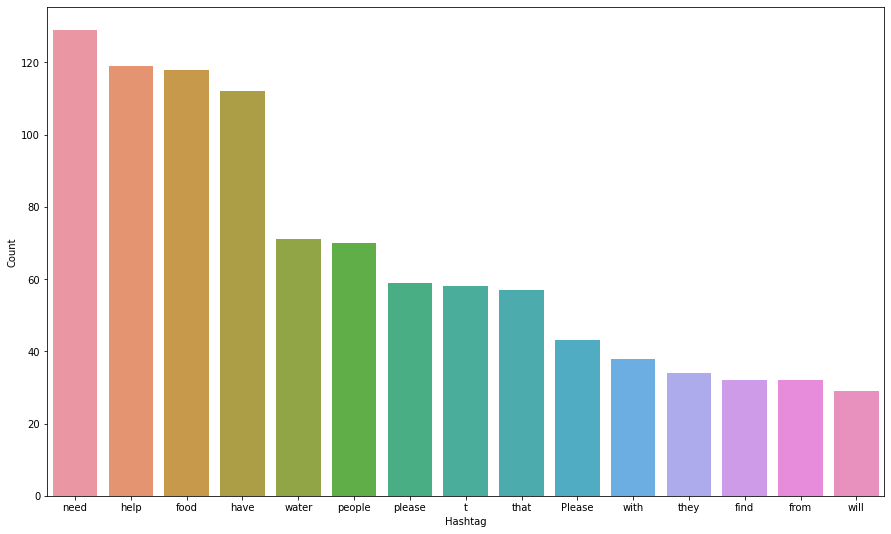

In [73]:
#Select top 15 hashtag disaster
df1 = df1.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=df1, x='Hashtag', y='Count')
plt.savefig('Select top 15 hashtag disaster dengan request = 1.png')
plt.show()

In [74]:
freq = nltk.FreqDist(ht_nondisaster)
df1 = pd.DataFrame({'Hashtag': (freq.keys()),
                    'Count': (freq.values())})
df1.head()

,Hashtag,Count
0,Looking,2
1,someone,17
2,name,4
3,going,24
4,call,26


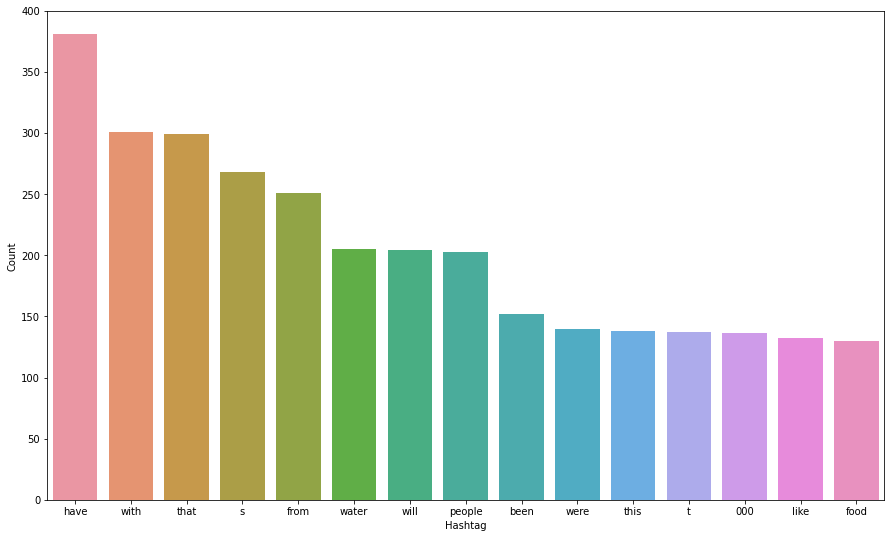

In [75]:
#Select top 15 hashtag nondisaster
df1 = df1.nlargest(columns='Count', n=15)
plt.figure(figsize=(15,9))
sns.barplot(data=df1, x='Hashtag', y='Count')
plt.savefig('Select top 15 hashtag disaster dengan request = 0.png')
plt.show()

Input Split

In [76]:
#feature extracion
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['message'])

In [77]:
#bow[0].toarray()

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['request'], random_state=42, test_size=0.25)

Model Training

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [80]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [81]:
# testing
prediction = model.predict(x_test)
f1_score(y_test, prediction)

0.544378698224852

In [82]:
accuracy_score(y_test, prediction)

0.8804347826086957

In [83]:
prediction_probability = model.predict_proba(x_test)
prediction = prediction_probability[:, 1] >= 0.3
prediction = prediction.astype(np.int)


f1_score(y_test, prediction)

0.5915492957746479

In [84]:
accuracy_score(y_test, prediction)

0.8649068322981367

In [85]:
prediction_probability[0][1] >= 0.3

False